# **Project 3**
---
Thodori Kapouranis, Steven Lee

Frequentist Machine Learning

Professor Samuel Keene

# **Bad K-folding**

Cross validation score: 1.0


Text(0.5, 0, 'Correlations of Selected Predictors with Outcome')

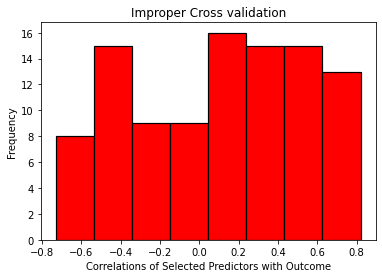

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

x = np.random.randn(50,5000)
y = [np.ones(25), np.zeros(25)]
y = np.hstack( (y[0], y[1]) )
random.shuffle(y)

# Making the data frame
df = pd.DataFrame(x)
df['label']=y

# Making the correlation tables
corr_matrix = df.corr()

# Find out the 100 features with the best correlation
corr_matrix['label'][:] = abs(corr_matrix['label'][:])
best_features = corr_matrix['label'][:].sort_values(ascending=False)[1:101] 

best_index = best_features.index

best_x = np.zeros((50,100))

# Remake the observations to only have the best 100 features stored in best_x
for entry in range( len(x) ):
  for index in range( len( best_index ) ):
    best_x[entry][index] = x[entry][best_index[index]] 

x_folds = [ best_x[0:10], best_x[10:20], best_x[20:30], best_x[30:40], best_x[40:50] ]

y_folds = [ y[0:10], y[10:20], y[20:30], y[30:40], y[40:50]]


# K-fold and take the average of the CV error rate
score = []
for k in range( len( x_folds ) ):
  # Initialization
  classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
  x_val   = [ [i] for i in x_folds[k] ]
  y_val   = y_folds[k]
  x_train = x_folds[:][:]
  y_train = y_folds[:][:]

  # Make training set 
  x_train.pop(k)
  y_train.pop(k)

  # Turning into np array for easy shape manipulation
  x_val = np.array(x_val)
  x_val = x_val.squeeze()

  x_train = np.array(x_train)
  x_train = np.reshape(x_train, [40,100])

  y_train = np.array(y_train)
  y_train = np.reshape(y_train, [40])

  classifier.fit(x_train,y_train)
  score.append( classifier.score(x_val,y_val) )


print(f'Cross validation score: {sum(score)/5}')
  
randSamples = df.sample(n=10)
sampleCorr  = randSamples.corr()['label']
plt.hist( sampleCorr[best_index], bins='auto', color='r', edgecolor='black', linewidth=1.2 )
plt.title("Improper Cross validation")
plt.ylabel("Frequency")
plt.xlabel("Correlations of Selected Predictors with Outcome")

**Comments**
---
The results match up with the textbook.

This method of K-folding gives cross validation error results that are too good to be true. This is due to the model knowing the information about the validation set when it picks its coefficients, so the predictions will be overfitted to fit that specific pattern. 

This is bad generalization because the dataset's true nature is completely random, therefore a CV error of 50% is proper.

# **Good K-folding**

Cross validation score: 0.5399999999999999


Text(0.5, 0, 'Correlations of Selected Predictors with Outcome')

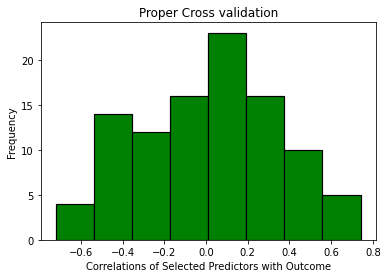

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

x = np.random.randn(50,5000)
y = [np.ones(25), np.zeros(25)]
y = np.hstack( (y[0], y[1]) )
random.shuffle(y)

# Fold our information into 5 sections
x_folds = [ x[0:10], x[10:20], x[20:30], x[30:40], x[40:50] ]
y_folds = [ y[0:10], y[10:20], y[20:30], y[30:40], y[40:50] ]

# K-fold and take the average of the CV error rate
score = []
for k in range( len( x_folds ) ):
  
  # Initialization
  classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

  x_train = x_folds[:][:]
  y_train = y_folds[:][:]

  # Make training set 
  x_train.pop(k)
  y_train.pop(k)

  # Turning into np array for easy shape manipulation
  x_train = np.array(x_train)
  x_train = np.reshape(x_train, [40,5000])

  y_train = np.array(y_train)
  y_train = np.reshape(y_train, [40])

  # Make table only from the visible information from the training set
  ktable = pd.DataFrame(x_train)
  ktable["label"] = y_train

  # Find correlation only from visible information
  corr_matrix = ktable.corr()
  corr_matrix['label'][:] = abs(corr_matrix['label'][:])
  best_features = corr_matrix['label'][:].sort_values(ascending=False)[1:101] 
  best_index = best_features.index
  best_x = np.zeros((50,100))

  # Remake the observations to only have the best 100 features stored in best_x
  for entry in range( len(x) ):
    for index in range( len( best_index ) ):
      best_x[entry][index] = x[entry][best_index[index]] 

  best_x_folds = [ best_x[0:10], best_x[10:20], best_x[20:30], best_x[30:40], best_x[40:50] ]

  # Grab new validation set, selecting only best 100 features
  x_val   = [ [i] for i in best_x_folds[k] ]
  x_val   = np.array(x_val)
  x_val   = x_val.squeeze()

  y_val   = y_folds[k]

  # Remake our training set to only include the best 100 features
  best_training = best_x_folds[:][:]
  best_training.pop(k)
  best_training = np.array(best_training)
  best_training = np.reshape(best_training, [40, 100])

  # Score!!!@#!@!@!@!@
  classifier.fit(best_training,y_train)
  score.append( classifier.score(x_val,y_val) )

print(f'Cross validation score: {sum(score)/5}')
  
randSamples = df.sample(n=10)
sampleCorr  = randSamples.corr()['label']
plt.hist( sampleCorr[best_index], bins='auto', color='g', edgecolor='black', linewidth=1.2 )
plt.title("Proper Cross validation")
plt.ylabel("Frequency")
plt.xlabel("Correlations of Selected Predictors with Outcome")

**Comments**
---
When the program runs, the cross validation score is consistently at around 50%, the expected accuracy score of a randomly independent distributed set. 

Correct k-folding results this because you do not pick your features using information about the validation/testing set because you treat them as if you can't see them. This way, the model is not cheating by knowing information it shouldn't, and therefore the model's CV error will be more representative.